In [53]:
import numpy as np
import polars as pl
import polars.selectors as cs
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import great_tables as tg
import altair as alt

In [54]:
df_path = '../DATASETS/Mall_Customers.csv'

In [55]:
df = pl.read_csv(df_path)

In [56]:
df

CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
i64,str,i64,i64,i64
1,"""Male""",19,15,39
2,"""Male""",21,15,81
3,"""Female""",20,16,6
4,"""Female""",23,16,77
5,"""Female""",31,17,40
…,…,…,…,…
196,"""Female""",35,120,79
197,"""Female""",45,126,28
198,"""Male""",32,126,74


In [57]:
X = df.select(['Annual Income (k$)', 'Spending Score (1-100)'])

In [58]:
X

Annual Income (k$),Spending Score (1-100)
i64,i64
15,39
15,81
16,6
16,77
17,40
…,…
120,79
126,28
126,74


In [59]:
import scipy.cluster.hierarchy as sch

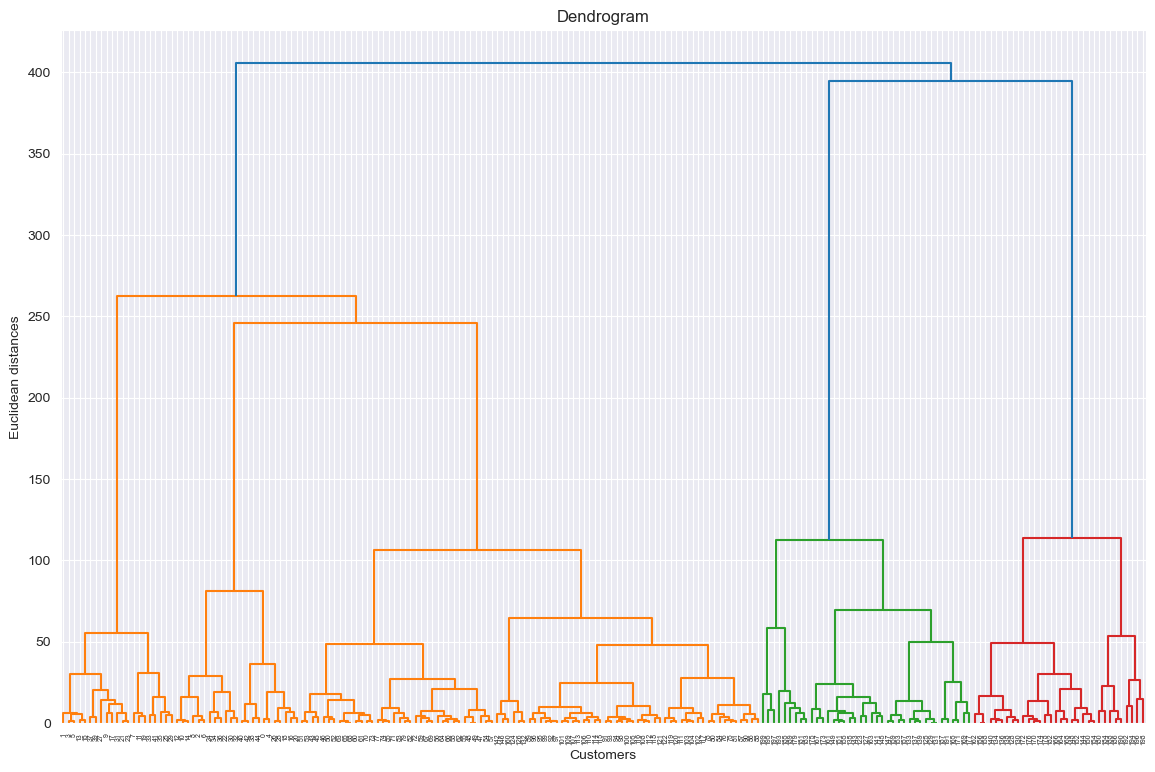

In [60]:
plt.figure(figsize=(14, 9))
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [61]:
from sklearn.cluster import AgglomerativeClustering

In [62]:
agglomerative_clustering = AgglomerativeClustering(
    n_clusters=5,
    linkage='ward',
)

In [63]:
y_hc = agglomerative_clustering.fit_predict(X)

In [64]:
y_hc = pl.Series('Cluster', y_hc)

In [65]:
combined_data = X.with_columns(pl.Series('Cluster', y_hc))
combined_data

Annual Income (k$),Spending Score (1-100),Cluster
i64,i64,i64
15,39,4
15,81,3
16,6,4
16,77,3
17,40,4
…,…,…
120,79,2
126,28,0
126,74,2


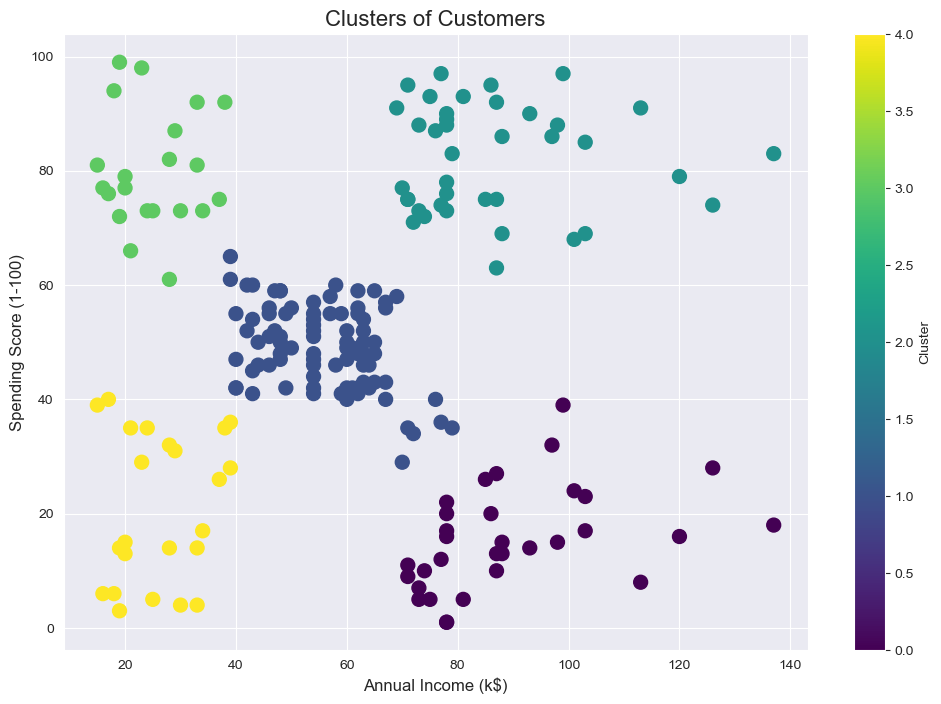

In [66]:
# Scatter plot using matplotlib
plt.figure(figsize=(12, 8))
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c=y_hc, cmap='viridis', s=100)
plt.title('Clusters of Customers', fontsize=16)
plt.xlabel('Annual Income (k$)', fontsize=12)
plt.ylabel('Spending Score (1-100)', fontsize=12)
plt.colorbar(label='Cluster')
plt.show()

In [67]:
fig = px.scatter(
    data_frame=combined_data,
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    color='Cluster',
    title='Clusters of Customers',
    labels={'Annual Income (k$)': 'Annual Income', 'Spending Score (1-100)': 'Spending Score'},
    # template='plotly'
).update_layout(
    width=1000,
    height=600
)

fig.show()

In [68]:
scatter_plot = alt.Chart(combined_data.to_pandas()).mark_circle().encode(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    color=alt.Color('Cluster:N', legend=alt.Legend(title="Cluster")),
    tooltip=['Annual Income (k$)', 'Spending Score (1-100)', 'Cluster']
).properties(
    title='Clusters of Customers',
    width=600,
    height=400
)

scatter_plot

alt.Chart(...)